## Copyright Note


**This lecture mainly examples are adapted from wiki and internet resources and the below refernces.


## Deep Learning Reference

**Most of the deep learning and convolution neural network materials' figures, definitions, and examples are courtesy of or adapted from the following book**: Deep Learning with Python by Francois Chollet (2018)[relative link](https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438/ref=sr_1_3?ie=UTF8&qid=1532546159&sr=8-3&keywords=deep+learning+with+python)




## Learning concepts:

1. Problems of feed-forward (FF) of neural networks.
2. Recurrent Neural Network (RNN) Basics.
3. Types of RNNs.
4. Simple RNN implementations.
5. When to use Conv2D/Conv1D/RNN?
6. Difference between HMM (Hidden Markov Model) and RNN

## Feed-Forward (FF) Neural Networks (NN)

#### FF NN Problems:

1. Cann't handle sequential/time-series data:
  - Sequential Data is any kind of data where the order matters as you said. 
  -  A time series is a sequence taken at successive equally spaced points in time and it is not the only case of sequential data.

2. Cann't memorize the previous history or inputs. 

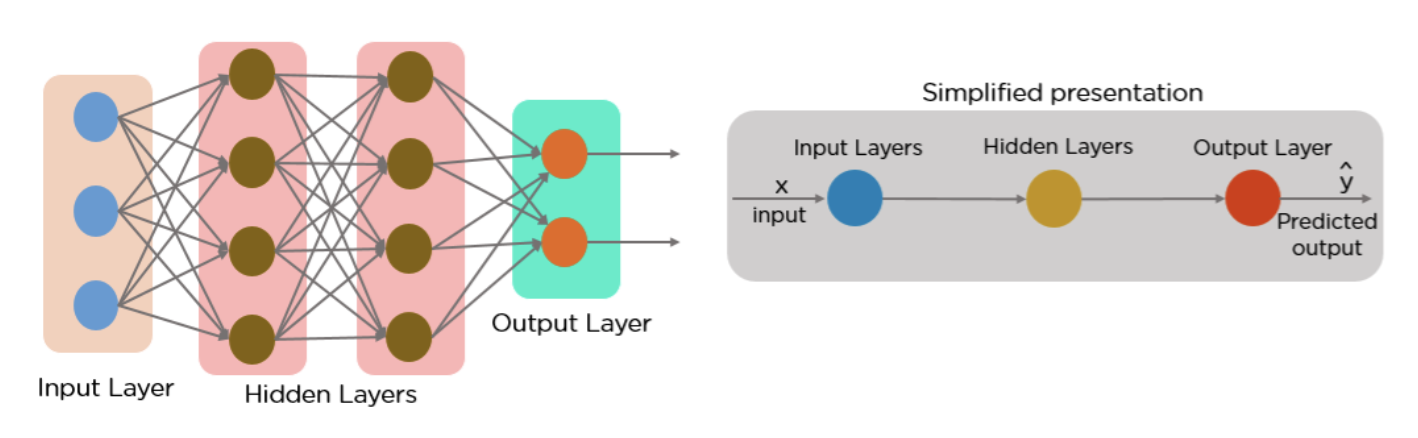

### Analogy to [Convolutional Neural Network](https://cs231n.github.io/convolutional-networks/#conv)

1. Filters that contain neorns.
2. Layers.

## Recurrent Neural Network

A recurrent neural network (RNN) adopts the same principle, albeit in an extremely simplified version: it processes sequences by iterating through the sequence elements and maintaining a state containing information.





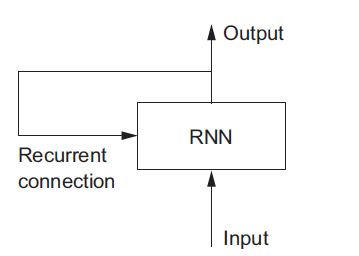

## RNN Cell is an analogy of  a CNN Filter

According to Tensorflow documentation, “**An RNN cell**, in the most abstract setting, is anything that has a state and performs some operation that takes a matrix of inputs.

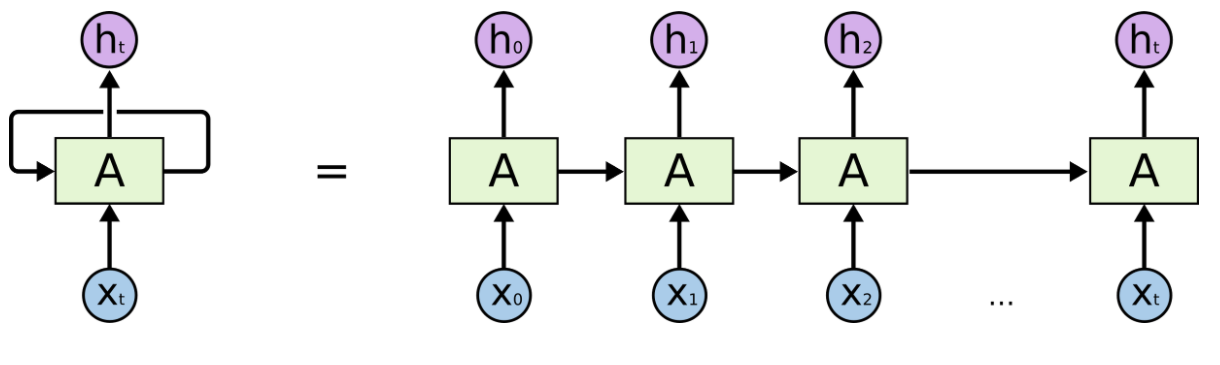



### A RNN Layer


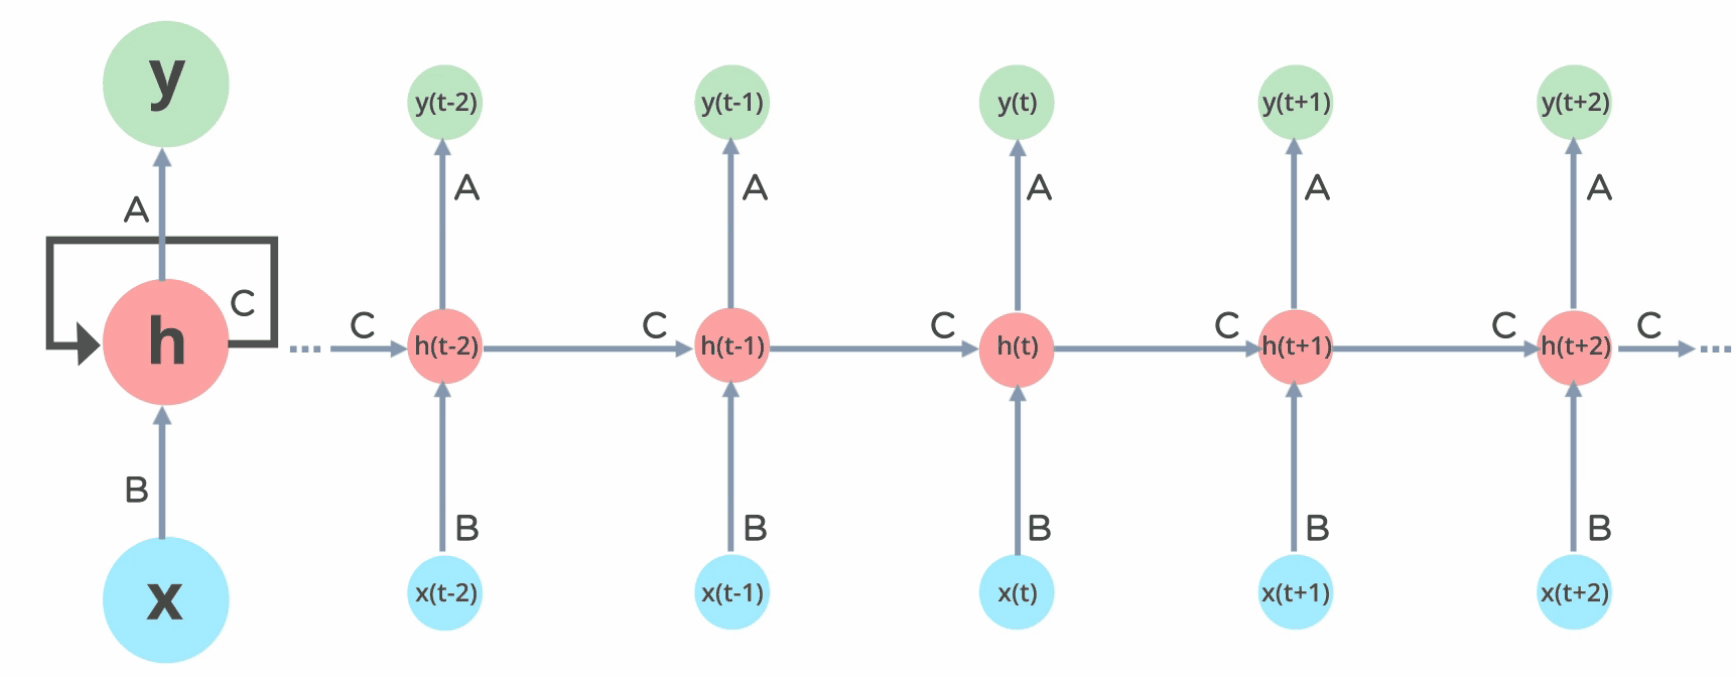

## Types of Recurrent Neural Networks

1. One to One.
2. One to Many.
3. Many to One.
4. Many to Many.



## One to One RNN
This type of neural network is known as the Vanilla Neural Network. It's used for general machine learning problems, which has a single input and a single output.

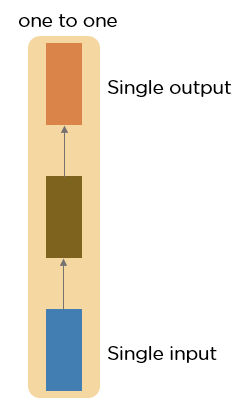

## One to Many RNN
This type of neural network has a single input and multiple outputs. An example of this is the image caption.

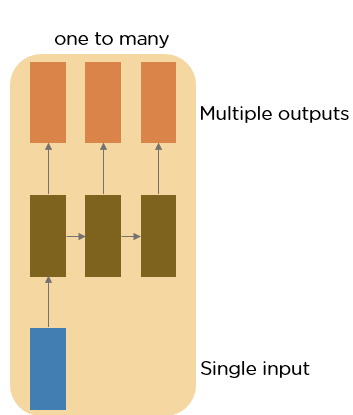

## Many to One RNN

This RNN takes a sequence of inputs and generates a single output. Sentiment analysis is a good example of this kind of network where a given sentence can be classified as expressing positive or negative sentiments.

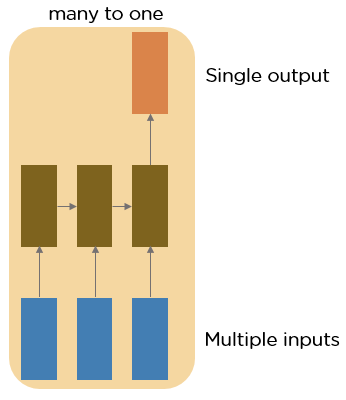

## Many to Many RNN

This RNN takes a sequence of inputs and generates a sequence of outputs. Machine translation is one of the examples

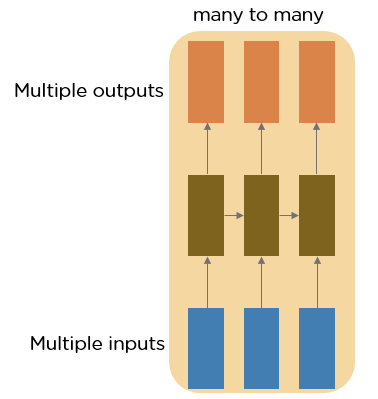

## The view of RNN mathematical and activation functions 

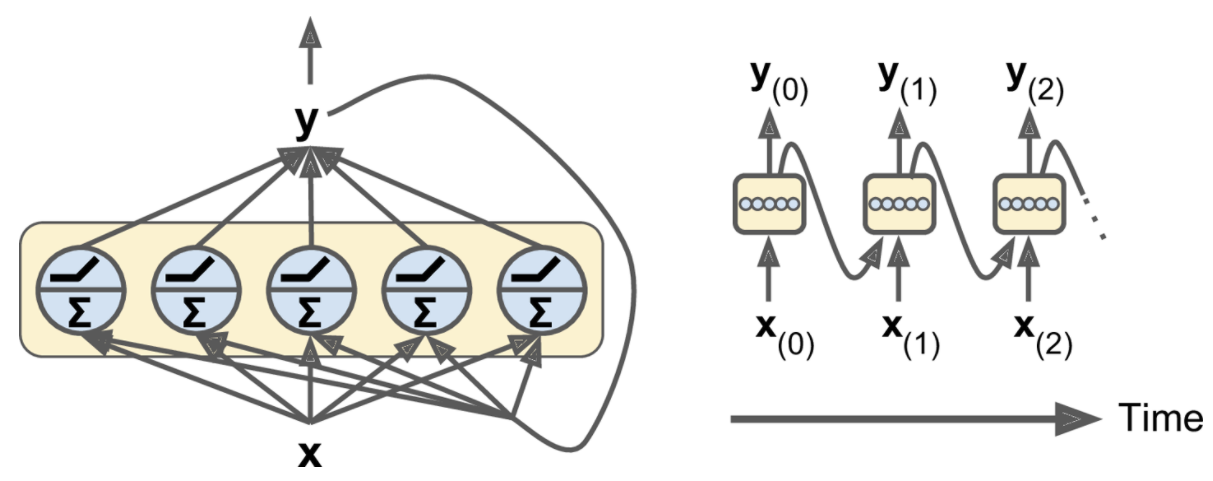

$Y_{(t)}$ is an $m x n_{neorons}$ matrix containing the layer’s outputs at time step t for each instance in the mini-batch (m is the number of instances in the mini-batch and $n_{neurons}$ is the number of neurons).

$X_{t}$ is an $m x n_{inputs}$ matrix containing the inputs for all instances ($n_{inputs}$ is the number of input features).

$W_{x}$ is an $n_{inputs}xn_{neorns}$ matrix containing the connection weights for the inputs of the current time step.

$W_{y}$ is an $n_{neorns}xn_{neorns}$ matrix containing the connection weights for the outputs of the previous time step.

$b$ is a vector of size $n_{neorn}$ containing each neorn's bias term and $\theta(.)$ is an activation funtion.

The weight matrices Wx and Wy are often concatenated vertically into a single weight matrix W of shape ($n_{inputs}$ + $n_{neurons}) x n_{neurons}$

The notation $[X_{(t)} Y_{(t–1)}]$ represents the horizontal concatenation of the matrices $X_{(t)}$ and $Y_{(t–1)}$.



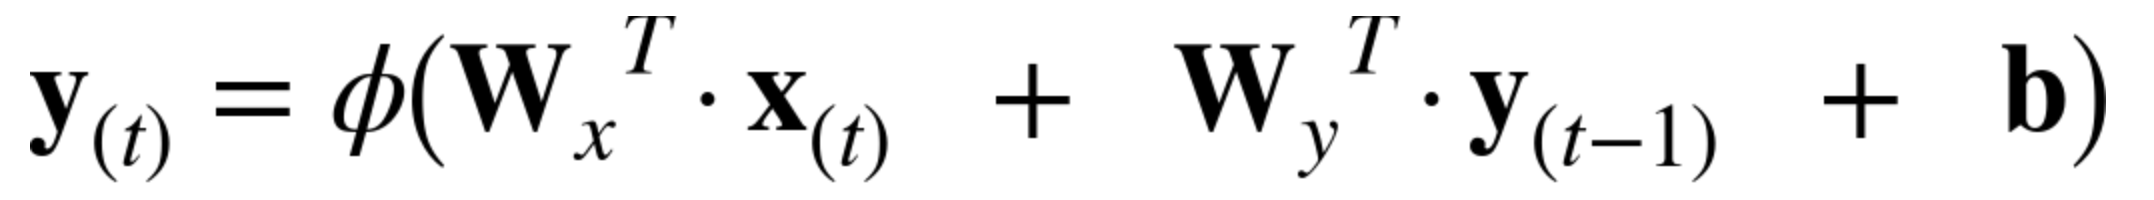






#####  Numpy implementation of a simple NN -- See the above reference book


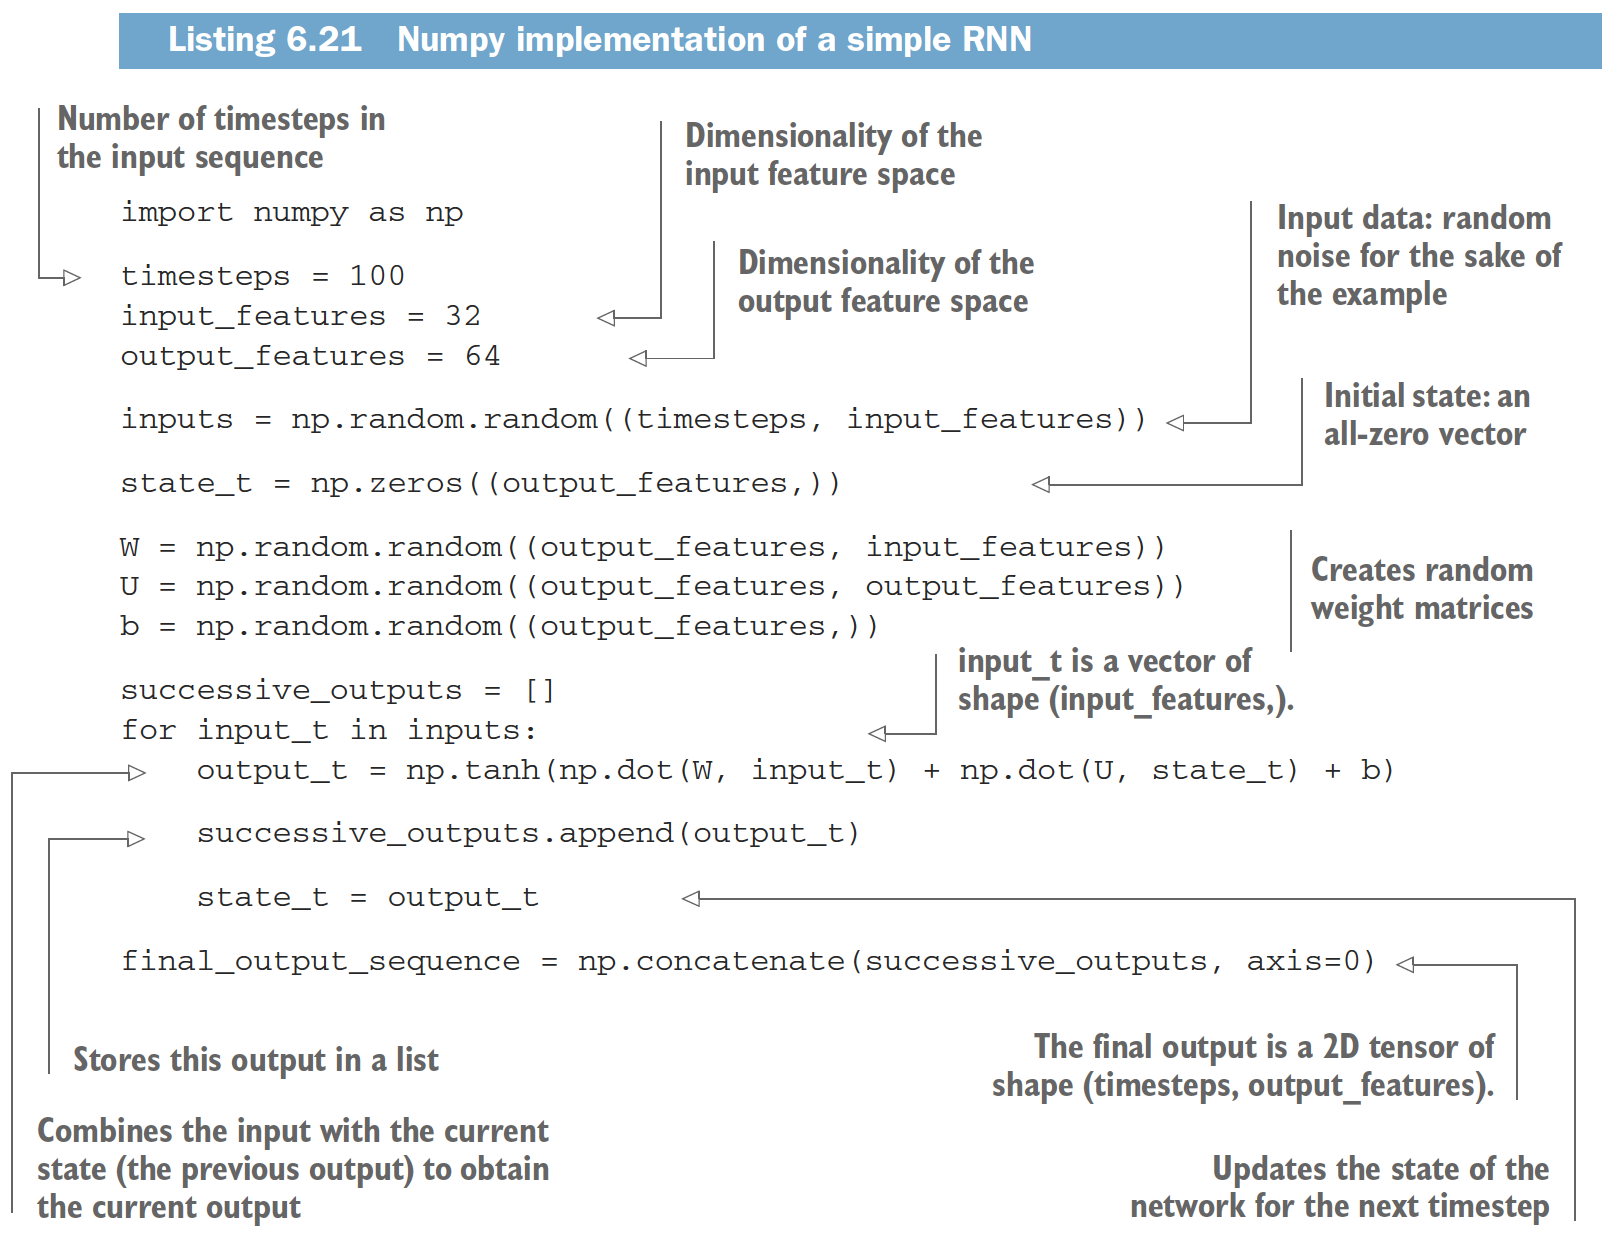

### Basic RNNs in TensorFlow 

#### [Implementation for illustrations only]

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

n_inputs = 3
n_neurons = 5

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons],dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=[n_neurons,n_neurons],dtype=tf.float32))
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)

init = tf.global_variables_initializer()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
import numpy as np

# Mini-batch:        instance 0,instance 1,instance 2,instance 3
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]]) # t = 0
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) # t = 1

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})


In [ ]:
print(Y0_val)  # output at t = 0, instances=4, n_neorons=5

[[-0.38885927  0.99823207 -0.3907458  -0.99887633  0.99989   ]
 [ 0.4132456   0.99999976 -0.85087335 -0.99999976  0.99999976]
 [ 0.8589939   0.99999976 -0.9707957  -0.99999976  0.99999976]
 [ 0.99999976  0.9996465   0.99995095  0.999258    0.72689027]]


In [ ]:
print(Y1_val)  # output at t = 1, instances=4, n_neorons=5


[[ 0.9002101   0.99999976 -0.9933022  -0.99999976  0.99999976]
 [ 0.2685708   0.28673416 -0.84718525 -0.948731   -0.05810242]
 [ 0.99614984  0.99999976 -0.99340737 -0.9999985   0.99999976]
 [ 0.9881581   0.99999976 -0.91861284 -0.5856687   0.9988673 ]]
